In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
X = np.array([(np.random.rand(1000)-0.5)*8,(np.random.rand(1000)-0.5)*8]).T

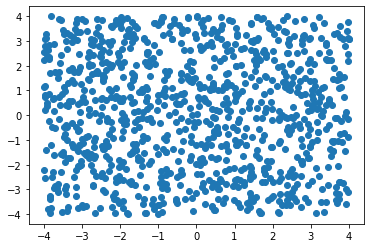

In [106]:
plt.scatter(X[:,0],X[:,1])


[-0.14092046  0.11410388]


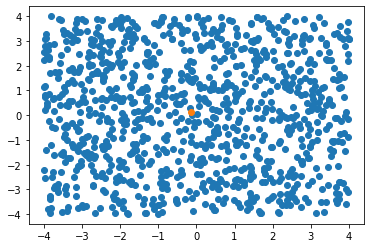

In [107]:
mX = np.mean(X, axis=0)
print(mX)
plt.scatter(X[:,0],X[:,1])
plt.scatter(mX[0],mX[1])


In [108]:
mX

array([-0.14092046,  0.11410388])

In [109]:
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = rng.choice(x, size=x.shape[0], replace=True)
        # replicate is a general term for a statistic computed
        # from a bootstrap sample
        bootstrap_replicate = np.mean(boot_sample)
        sample_means[i] = bootstrap_replicate
    return sample_means


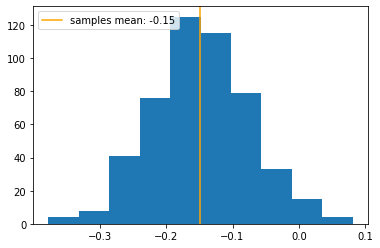

In [110]:
boot_50x = bootstrap_means(X[:,0], n_bootstrap_samples=500, seed=13)
boot_50y = bootstrap_means(X[:,1], n_bootstrap_samples=500, seed=13)

boot_meanx = np.median(boot_50x)
boot_meany = np.median(boot_50y)
plt.hist(boot_50x, bins=10)
plt.axvline(boot_meanx, color='orange', label='samples mean: %.2f' % boot_meanx)
#plt.xlabel('mean sepal length in cm')
#plt.ylabel('count')
plt.legend(loc=2)
plt.show()


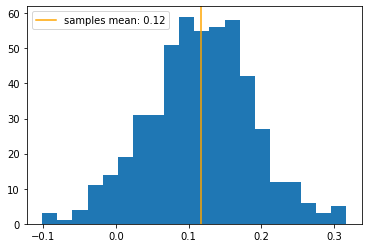

In [111]:
plt.hist(boot_50y, bins=20)
plt.axvline(boot_meany, color='orange', label='samples mean: %.2f' % boot_meany)
#plt.xlabel('mean sepal length in cm')
#plt.ylabel('count')
plt.legend(loc=2)
plt.show()


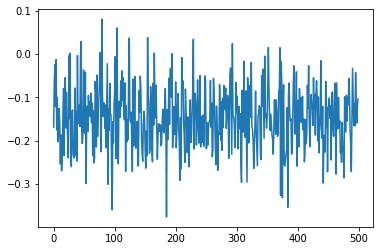

In [112]:
plt.plot(boot_50x)

In [113]:
np.std(boot_50x, ddof=1)
#O histograma do bootstrapping sempre vai ser normal, independente se a amostra tem distribuição normal

0.0728059336304602

In [114]:
se = np.std(X[:,0], ddof=1) / np.sqrt(X[:,0].shape[0])
print('standard error', se)

standard error 0.07304917954698156


In [115]:
boot_2500 = bootstrap_means(X[:,0], n_bootstrap_samples=2500, seed=123)

lower, upper = np.percentile(boot_2500, [2.5, 97.5])

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [-0.29, -0.00]


In [116]:
import scipy.stats

def confidence_interval(x, ci=0.95):
    x_mean = np.mean(x)
    se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
    h = se * scipy.stats.t._ppf((1 + ci)/2. , x.shape[0])
    return x_mean - h, x_mean + h

lower, upper = confidence_interval(X[:,0], ci=0.95)


print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))


95% confidence interval: [-0.28, 0.00]
